# Kishan Prajapati - 21D070048
# Tanishka Pradhan - 210040159
# Akshat Taparia - 210110014

## EE782 Course Project : Web Scraping and Sentiment Analysis of Financial News

## Link : https://drive.google.com/file/d/1WHePlqMWUBt7_RxxwUMxS3LMiyY1G49B/view?usp=sharing


Original Website: 
- https://www.cnbc.com/sp-500/
- https://www.reuters.com/news/archive/businessnews
- https://www.theguardian.com/business/all

Since the news is being updated every day, the data uses in this study can be found here: https://github.com/notlongp/news-headlines-webscrape. This script is a template for future references.

## CNBC Scraping

In [ ]:
import requests

URL = 'https://www.cnbc.com/sp-500/'
page = requests.get(URL)

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find_all("div", {"class": "stories-lineup bigHeader"})
results = results[0] # since there's only one "stories-lineup bigHeader" class per page

In [ ]:
# Example
temp = results.find_all("li")
print(temp[0].find("div", {"class": "headline"}).get_text().strip())
print(temp[0].find("time").get_text())
print(temp[0].find("p", {"class": "desc"}).get_text())

In [ ]:
# Functions to avoid Commercial Containers
def cnbc_headline_try_except(var):
    try:
        return var.find("div", {"class": "headline"}).get_text().strip()
    except AttributeError:
        pass

def cnbc_time_try_except(var):
    try:
        return var.find("time").get_text()
    except AttributeError:
        pass
    
def cnbc_text_try_except(var):
    try:
        return var.find("p", {"class": "desc"}).get_text()
    except AttributeError:
        pass

In [ ]:
meta = []
# A loop that runs through 140 CNBC's news pages and record all headlines, last updated date, and preview text
for i in range(1, 141):
    currURL = URL + "?page=" + str(i)
    page = requests.get(currURL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all("div", {"class": "stories-lineup bigHeader"})
    results = results[0]
    items = results.find_all("li")
    for item in items:
        arr = []
        arr.append(cnbc_headline_try_except(item))
        arr.append(cnbc_time_try_except(item))
        arr.append(cnbc_text_try_except(item))
        meta.append(arr)

In [ ]:
import pandas as pd
df = pd.DataFrame.from_records(meta)
df.columns = ["Headlines", "Time", "Description"]
df

In [ ]:
# Information about the data
df.info()

In [ ]:
# Exporting the data to csv
df.to_csv("./data/cnbc_headlines.csv", index = False)

## Reuters Scraping

In [ ]:
# I can apply the same method to scrape data from Reuters
URL = 'https://www.reuters.com/news/archive/businessnews'
page = requests.get(URL)

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find_all("div", {"class": "column1 col col-10"})
results = results[0]

In [ ]:
# Example
temp = results.find_all("article", {"class": "story"})
print(temp[0].find("h3").get_text().strip())
print(temp[0].find("time").get_text().strip())
print(temp[0].find("p").get_text().strip())

In [ ]:
def reuters_headline_try_except(var):
    try:
        return var.find("h3").get_text().strip()
    except AttributeError:
        pass

def reuters_time_try_except(var):
    try:
        return var.find("time").get_text().strip()
    except AttributeError:
        pass
    
def reuters_text_try_except(var):
    try:
        return var.find("p").get_text().strip()
    except AttributeError:
        pass

In [ ]:
meta = []
# A loop that runs through 3277 CNBC's news pages (the maximum amount) of archived articles 
# and record all headlines, last updated date, and preview text
# Reuters data only goes as far back as March 2018
for i in range(1, 3278):
    currURL = URL + "?view=page&page=" + str(i) + "&pageSize=10"
    page = requests.get(currURL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all("div", {"class": "column1 col col-10"})
    results = results[0]
    items = results.find_all("article", {"class": "story"})
    for item in items:
        arr = []
        arr.append(headline_try_except(item))
        arr.append(time_try_except(item))
        arr.append(text_try_except(item))
        meta.append(arr)

In [ ]:
df = pd.DataFrame.from_records(meta)
df.columns = ["Headlines", "Time", "Description"]
df

In [ ]:
# Information about the data
df.info()

In [ ]:
# Exporting the data to csv
df.to_csv("./data/reuters_headlines.csv", index = False)

# The Guardian Scraping

In [ ]:
# Similarly to the Guardian
# However, articles from the Guardian do not contain preview text, 
# so I can only scrape the headlines 
URL = 'https://www.theguardian.com/business/all'
page = requests.get(URL)

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find_all("div", {"class": "fc-container__inner"})
# Unlike the first 2, there are exactly 2 of these <div> every page 
# on the guardian so I will keep the indexing

In [ ]:
# Example
day1 = results[0].find_all("div", {"class": "fc-item__container"})
day2 = results[1].find_all("div", {"class": "fc-item__container"})

print(results[0].find("time").get_text())
print(day1[1].find("a").get_text().strip())

print(results[1].find("time").get_text())
print(day2[1].find("a").get_text().strip())

In [ ]:
meta = []
# A loop that runs through 890 CNBC's news pages and record all headlines and last updated date
for i in range(1, 891):
    currURL = URL + "?page=" + str(i)
    page = requests.get(currURL)
    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all("div", {"class": "fc-container__inner"})
    
    for result in results:
        days = result.find_all("div", {"class": "fc-item__container"})
        for day in days:
            arr = []
            arr.append(results[0].find("time").get_text())
            arr.append(day.find("a").get_text().strip())
            meta.append(arr)

In [ ]:
df = pd.DataFrame.from_records(meta)
df.columns = ["Time", "Headlines"]
df

In [ ]:
# Information about the data
df.info()

In [ ]:
# Exporting the data to csv
df.to_csv("./data/guardian_headlines.csv", index = False)

# Data Cleaning - Financial News Sentiment - NLP application

Data Cleaning process

## Data Cleaning (CNBC)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("./data/cnbc_headlines.csv")
df1 = df1.dropna()
df1 = df1.drop_duplicates(subset=['Headlines', 'Description'], keep='first')
df1.reset_index(drop=True, inplace=True)
df1

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2790 non-null   object
 1   Time         2790 non-null   object
 2   Description  2790 non-null   object
dtypes: object(3)
memory usage: 65.5+ KB


### Unusual datetime naming convention

The abbreviation for September is Sep, not Sept as listed in this data set. At the same time, while many rows use the standard abbreviation form of the month (Sept), others use a different abbreviation, sometimes even the full name of the month (March, April, June, July). Therefore, the function below aims to replace all unusual abbreviations from the datetime. This function also aim to replace leading space " " with a "0" (padding a character "0") before any representation of posted hour (and posted date) that is smaller than 10 (0, 1, ..., 9).

In [4]:
def replace_dt(s):
    s = s.replace("Sept", "Sep").replace("March", "Mar").replace("April", "Apr").replace("June", "Jun").replace("July", "Jul")
    if s[0].isspace():
        s = s.replace(" ", "0", 1)
    s = s.replace(",  ", ", 0", 1)
    return s

In [5]:
from datetime import datetime
f = '%I:%M  %p ET %a, %d %b %Y'
dates = []
times = []
for item in df1.iloc[:, 1].values:
    item = replace_dt(item)
    dates.append(datetime.strptime(item, f).strftime("%m-%d-%Y"))
    times.append(datetime.strptime(item, f).strftime("%H:%M:%S"))

In [6]:
df1['Date'] = dates
df1["Date"] = df1["Date"].astype("datetime64")
df1['Time'] = times
df1 = df1[["Date", "Time", "Headlines", "Description"]]
df1

,Date,Time,Headlines,Description
0,2020-07-17,19:51:00,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying..."
1,2020-07-17,19:33:00,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin..."
2,2020-07-17,19:25:00,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co..."
3,2020-07-17,16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,2020-07-16,19:36:00,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies..."
...,...,...,...,...
2785,2017-12-26,10:15:00,Markets lack Christmas cheer,"According to Kensho, here's how markets have f..."
2786,2018-09-20,11:12:00,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...
2787,2017-12-22,19:07:00,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...
2788,2017-12-22,19:07:00,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di..."


In [7]:
# Storing data for later use (EDA, NLP, ANN and RNN)
%store df1

Stored 'df1' (DataFrame)


# Data Cleaning (Reuters)

In [8]:
df2 = pd.read_csv("./data/reuters_headlines.csv")
df2 = df2.dropna()
df2 = df2.drop_duplicates(subset=['Headlines', 'Description'], keep='first')
df2.reset_index(drop=True, inplace=True)
df2

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32691,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32692,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32693,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32694,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [9]:
df2["Time"] = df2["Time"].astype("datetime64")
df2 = df2[["Time", "Headlines", "Description"]]
df2.rename(columns={"Time":"Date"}, inplace = True)
df2

,Date,Headlines,Description
0,2020-07-18,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...
2,2020-07-18,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...
3,2020-07-18,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...
4,2020-07-17,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...
...,...,...,...
32691,2018-03-20,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...
32692,2018-03-20,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...
32693,2018-03-20,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...
32694,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32696 entries, 0 to 32695
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         32696 non-null  datetime64[ns]
 1   Headlines    32696 non-null  object        
 2   Description  32696 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 766.4+ KB


In [11]:
# Storing data
%store df2

Stored 'df2' (DataFrame)


# Data Cleaning (the Guardian)

In [12]:
df3 = pd.read_csv("./data/guardian_headlines.csv")
df3 = df3.dropna()
df3 = df3.drop_duplicates(subset=['Headlines'], keep='first')
df3.reset_index(drop=True, inplace=True)
df3

,Time,Headlines
0,19 July 2020,Business leader \n\n\n Vestager has tasted d...
1,19 July 2020,Observer business agenda \n\n\n Centrica: se...
2,19 July 2020,Hidden gems from the world of research \n\n\n...
3,19 July 2020,Johnson is asking Santa for a Christmas recovery
4,19 July 2020,‘I now fear the worst’: four grim tales of wor...
...,...,...
17789,17 December 2017,"Uber stole trade secrets, bribed foreign offic..."
17790,17 December 2017,Hundreds to lose jobs as Britvic shuts down No...
17791,17 December 2017,How investing in solar energy can create a bri...
17792,17 December 2017,Poundland suppliers hit by insurance downgrade


In [13]:
df3["Time"] = df3["Time"].astype("datetime64")
df3.rename(columns={"Time":"Date"}, inplace = True)
df3

,Date,Headlines
0,2020-07-19,Business leader \n\n\n Vestager has tasted d...
1,2020-07-19,Observer business agenda \n\n\n Centrica: se...
2,2020-07-19,Hidden gems from the world of research \n\n\n...
3,2020-07-19,Johnson is asking Santa for a Christmas recovery
4,2020-07-19,‘I now fear the worst’: four grim tales of wor...
...,...,...
17789,2017-12-17,"Uber stole trade secrets, bribed foreign offic..."
17790,2017-12-17,Hundreds to lose jobs as Britvic shuts down No...
17791,2017-12-17,How investing in solar energy can create a bri...
17792,2017-12-17,Poundland suppliers hit by insurance downgrade


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17794 entries, 0 to 17793
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       17794 non-null  datetime64[ns]
 1   Headlines  17794 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 278.2+ KB


In [15]:
# Storing data
%store df3

Stored 'df3' (DataFrame)


# EDA - Financial News Sentiment - NLP application

Exploratory Analysis

## CNBC data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def articles_per_month(df, l):
    df["Headlines"].groupby([df["Date"].dt.year, df["Date"].dt.month]).count().plot(kind="bar")
    plt.title("Number of Articles per Month (%s)" %l)

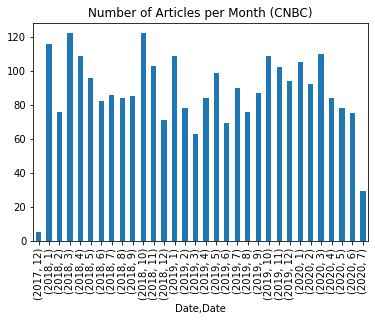

In [9]:
%store -r df1
articles_per_month(df1, "CNBC")

## Reuters data

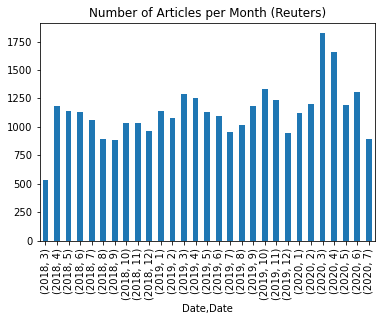

In [10]:
%store -r df2
articles_per_month(df2, "Reuters")

# The Guardian data

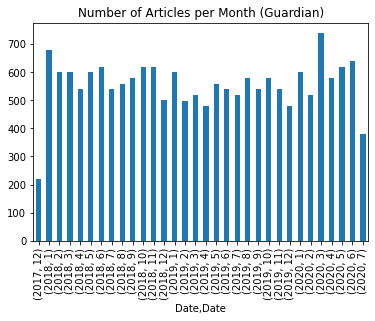

In [13]:
%store -r df3
articles_per_month(df3, "Guardian")

# Polarity Analysis with TextBlob - Financial News Sentiment

TextBlob().sentiment.polarity returns the sentiment evaluated by TextBlob with values ranging from -1 (negative) to 1 (positive).

## CNBC data

In [19]:
%store -r df1
from textblob import TextBlob

polarities = []
for value in df1["Headlines"].values:
    wiki = TextBlob(value)
    polarities.append(wiki.sentiment.polarity)

In [2]:
polarities[0:10]

[0.5,
 0.19999999999999998,
 0.0,
 0.0,
 0.6,
 -0.125,
 0.0,
 -0.3125,
 0.0,
 0.13636363636363635]

In [3]:
df1['tb_hl_polarity'] = polarities
df1

,Date,Time,Headlines,Description,tb_hl_polarity
0,2020-07-17,19:51:00,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying...",0.500000
1,2020-07-17,19:33:00,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin...",0.200000
2,2020-07-17,19:25:00,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co...",0.000000
3,2020-07-17,16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.000000
4,2020-07-16,19:36:00,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies...",0.600000
...,...,...,...,...,...
2785,2017-12-26,10:15:00,Markets lack Christmas cheer,"According to Kensho, here's how markets have f...",0.000000
2786,2018-09-20,11:12:00,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...,0.000000
2787,2017-12-22,19:07:00,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...,-0.001389
2788,2017-12-22,19:07:00,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di...",0.000000


In [4]:
polarities = []
for value in df1["Description"].values:
    wiki = TextBlob(value)
    polarities.append(wiki.sentiment.polarity)

In [5]:
polarities[0:10]

[-0.1875,
 -0.4125,
 0.6,
 0.0,
 -0.1875,
 -0.4125,
 0.0,
 0.10833333333333334,
 -0.0050000000000000044,
 0.0]

In [6]:
df1['tb_ds_polarity'] = polarities
df1

,Date,Time,Headlines,Description,tb_hl_polarity,tb_ds_polarity
0,2020-07-17,19:51:00,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying...",0.500000,-0.187500
1,2020-07-17,19:33:00,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin...",0.200000,-0.412500
2,2020-07-17,19:25:00,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co...",0.000000,0.600000
3,2020-07-17,16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.000000,0.000000
4,2020-07-16,19:36:00,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies...",0.600000,-0.187500
...,...,...,...,...,...,...
2785,2017-12-26,10:15:00,Markets lack Christmas cheer,"According to Kensho, here's how markets have f...",0.000000,-0.250000
2786,2018-09-20,11:12:00,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...,0.000000,0.500000
2787,2017-12-22,19:07:00,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...,-0.001389,0.172222
2788,2017-12-22,19:07:00,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di...",0.000000,0.000000


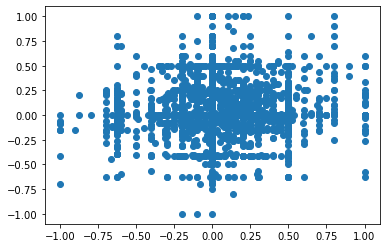

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df1['tb_hl_polarity'].values, df1['tb_ds_polarity'].values)
plt.show()

The data here seems very messy, that's why I decided to store the dataframe and perform clustering in Part 3.2.

In [8]:
textblob_df1 = df1
%store textblob_df1

Stored 'textblob_df1' (DataFrame)


# Reuters data

In [9]:
%store -r df2

polarities = []
for value in df2["Headlines"].values:
    wiki = TextBlob(value)
    polarities.append(wiki.sentiment.polarity)

In [10]:
df2['tb_hl_polarity'] = polarities
df2

,Date,Headlines,Description,tb_hl_polarity
0,2020-07-18,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...,-0.125000
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...,0.000000
2,2020-07-18,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...,-0.200000
3,2020-07-18,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...,0.000000
4,2020-07-17,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...,0.000000
...,...,...,...,...
32691,2018-03-20,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...,-0.100000
32692,2018-03-20,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...,0.136364
32693,2018-03-20,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...,0.000000
32694,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...,0.000000


In [11]:
polarities = []
for value in df2["Description"].values:
    wiki = TextBlob(value)
    polarities.append(wiki.sentiment.polarity)

In [12]:
df2['tb_ds_polarity'] = polarities
df2

,Date,Headlines,Description,tb_hl_polarity,tb_ds_polarity
0,2020-07-18,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...,-0.125000,-0.018750
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...,0.000000,0.109722
2,2020-07-18,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...,-0.200000,0.000000
3,2020-07-18,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...,0.000000,0.500000
4,2020-07-17,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...,0.000000,0.018182
...,...,...,...,...,...
32691,2018-03-20,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...,-0.100000,-0.066667
32692,2018-03-20,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...,0.136364,0.117424
32693,2018-03-20,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...,0.000000,0.250000
32694,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...,0.000000,0.025000


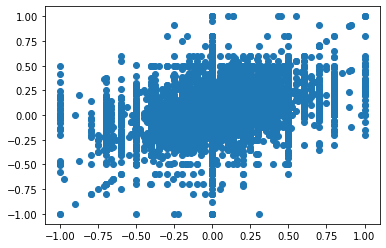

In [13]:
plt.scatter(df2['tb_hl_polarity'].values, df2['tb_ds_polarity'].values)
plt.show()

Similarly to CNBC data, the data here appears to be very messy, that's why I decided to store the dataframe and perform clustering in Part 3.2.

In [14]:
textblob_df2 = df2
%store textblob_df2

Stored 'textblob_df2' (DataFrame)


# The Guardian data

In [15]:
%store -r df3

polarities = []
for value in df3["Headlines"].values:
    wiki = TextBlob(value)
    polarities.append(wiki.sentiment.polarity)

In [16]:
df3['tb_hl_polarity'] = polarities
df3

,Date,Headlines,tb_hl_polarity
0,2020-07-19,Business leader \n\n\n Vestager has tasted d...,0.000000
1,2020-07-19,Observer business agenda \n\n\n Centrica: se...,0.000000
2,2020-07-19,Hidden gems from the world of research \n\n\n...,-0.083333
3,2020-07-19,Johnson is asking Santa for a Christmas recovery,0.000000
4,2020-07-19,‘I now fear the worst’: four grim tales of wor...,-1.000000
...,...,...,...
17789,2017-12-17,"Uber stole trade secrets, bribed foreign offic...",-0.125000
17790,2017-12-17,Hundreds to lose jobs as Britvic shuts down No...,-0.155556
17791,2017-12-17,How investing in solar energy can create a bri...,0.000000
17792,2017-12-17,Poundland suppliers hit by insurance downgrade,0.000000


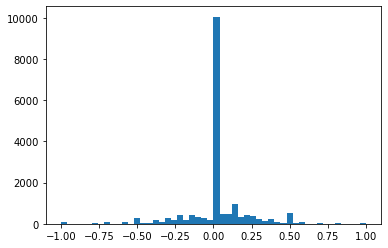

In [17]:
plt.hist(df3['tb_hl_polarity'], bins = 50)
plt.show()

Since clustering is not the best way to separate 1D array data, I decided to store this dataframe as well and perform natural breaks optimization in Part 3.2.

In [18]:
textblob_df3 = df3
%store textblob_df3

Stored 'textblob_df3' (DataFrame)


# Polarity Analysis with TextBlob - Clustering

In part 3.1, TextBlob calculated and returned the polarity of each article's headline and preview as a value between -1 and 1. However, that does not tell me what group (negative, neutral, positive) that each article belongs to, especially for articles with positive headlines and negative previews or vice versa. Therefore, utilizing clustering method, an unsupervised learning method of grouping data, I can put each article into their respective group of sentiment.

## CNBC data

For CNBC dataset, I use the 2 most popular clustering algorithms, K-Means Clustering and Hierarchical clustering, to categorized the sentiments of CNBC articles.

In [1]:
%store -r textblob_df1
X = textblob_df1.iloc[:, -2:].values

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

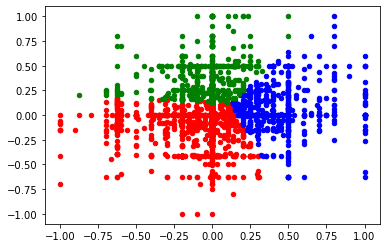

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [4]:
# import scipy.cluster.hierarchy as sch
# d = sch.dendrogram(sch.linkage(X, method = 'ward'))

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)

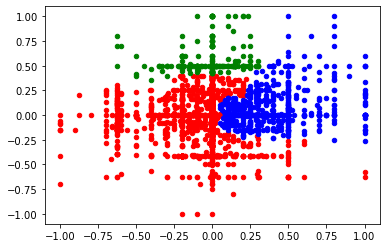

In [6]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_kmeans, y_hc3))
print(accuracy_score(y_kmeans, y_hc3))

[[1505  102    0]
 [  33  509    0]
 [ 328   12  301]]
0.8297491039426523


Assessing both K-Means and Hierarchical clusters, I can see that hierchical clustering method grouped data points that clearly have negative connotation (data points in the lower-left corner) with data points that are in the middle (implying that they have a neutral-positive connotation). Therefore, the favorable clustering model for this data is K-Means Clustering

From the scatter plot, I can conclude that data points colored in red (y=0) represent negative sentiment, data points colored in blue (y=1) represent positive sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [8]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
c_sentiments = [2 if y == 1 else 1 if y == 2 else 0 for y in y_kmeans]
c_sentiments[0:10]

[2, 0, 1, 0, 2, 0, 0, 0, 0, 0]

In [9]:
# Saving textblob sentiments
%store -r df1
final_df1 = df1
final_df1['tb_sentiment'] = c_sentiments
%store final_df1

Stored 'final_df1' (DataFrame)


# Reuters data

For Reuters data, since my device does not have the memory capacity to run hierchical clustering, I am also using K-Means Clustering for the sentiment scores.

In [10]:
%store -r textblob_df2
X = textblob_df2.iloc[:, -2:].values

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

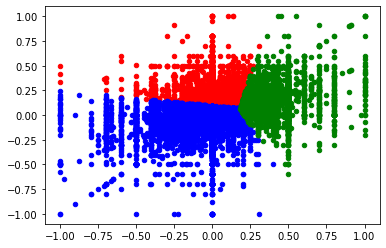

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [13]:
# The codelines below are for Hierarchical clustering
# hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [14]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

From the scatter plot, I can conclude that data points colored in blue (y=1) represent negative sentiment, data points colored in green (y=2) represent positive sentiment, and data points colored in red (y=0) represent a mixed sentiment, in which I will assign as neutral.

In [15]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
r_sentiments = [2 if y == 2 else 1 if y == 0 else 0 for y in y_kmeans]
r_sentiments[0:10]

[0, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [16]:
# Saving textblob sentiments
%store -r df2
final_df2 = df2
final_df2['tb_sentiment'] = r_sentiments
%store final_df2

Stored 'final_df2' (DataFrame)


## The Guardian data

Different from the other 2 datasets, the Guardian data only contains headlines. Therefore, instead of applying a clustering model, I apply a Natural Breaks Optimization to this dataset, specifically Jenks Natural Breaks.

In [17]:
%store -r textblob_df3
X = textblob_df3.iloc[:, -1:].values

c:\users\long's xps13\appdata\local\programs\python\python38\lib\site-packages\jenkspy\core.py:64: UserWarning: Invalid values encountered (NaN or Inf) were ignored
  warnings.warn('Invalid values encountered (NaN or Inf) were ignored')


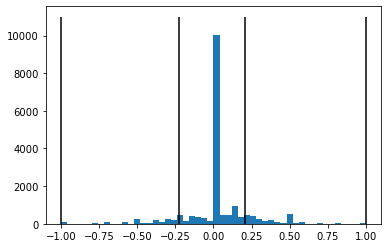

In [18]:
import jenkspy
breaks = jenkspy.jenks_breaks(X, nb_class=3)
plt.hist(X, bins = 50)
for b in breaks:
    plt.vlines(b, ymin=0, ymax=11000)

In [19]:
breaks

[-1.0, -0.22499999999999992, 0.20833333333333334, 1.0]

From the histogram, I can conclude that data points with sentiments below -0.22499999999999992 represent negative sentiment, data points with sentiments above 0.20833333333333334 represent positive sentiment, and data points with sentiments in between those 2 values represent neutral sentiment

In [20]:
g_sentiments = [0 if x <= breaks[1] else 2 if x >= breaks[2] else 1 for x in X]
g_sentiments[0:10]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]

In [21]:
# Saving textblob sentiments
%store -r df3
final_df3 = df3
final_df3['tb_sentiment'] = g_sentiments
%store final_df3

Stored 'final_df3' (DataFrame)


In [ ]:
# %store -r textblob_df1
# X = textblob_df1.iloc[:, -2:].values

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 0)
# y_kmeans = kmeans.fit_predict(X)

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'yellow', label = 'C4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'orange', label = 'C5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 20, c = 'cyan', label = 'C6')
# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 20, c = 'magenta', label = 'C7')
# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 20, c = 'black', label = 'C8')
# plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 20, c = 'purple', label = 'C9')

In [1]:
# From these 9 cluster, I can pick the 3 top right corner clusters to carry positive sentiment, 
# the 3 lower left clusters to carry negative sentiment, 
# and the rest (the 3 cluster along the diagonal with a negative slope) to carry neutral sentiment.

In [ ]:
# hc3 = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [ ]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')
# plt.scatter(X[y_hc3 == 3, 0], X[y_hc3 == 3, 1], s = 20, c = 'yellow', label = 'C4')
# plt.scatter(X[y_hc3 == 4, 0], X[y_hc3 == 4, 1], s = 20, c = 'orange', label = 'C5')
# plt.scatter(X[y_hc3 == 5, 0], X[y_hc3 == 5, 1], s = 20, c = 'cyan', label = 'C6')
# plt.scatter(X[y_hc3 == 6, 0], X[y_hc3 == 6, 1], s = 20, c = 'magenta', label = 'C7')
# plt.scatter(X[y_hc3 == 7, 0], X[y_hc3 == 7, 1], s = 20, c = 'black', label = 'C8')
# plt.scatter(X[y_hc3 == 8, 0], X[y_hc3 == 8, 1], s = 20, c = 'purple', label = 'C9')

# Polarity Analysis with vaderSentiment - Financial News Sentiment

Similar to TextBlob, vaderSentiment also returns the polarity scores of each article's headline and preview. However, vaderSentiment introduce compound score, which taken into account all 3 polarity scores generated (negativity, neutrality, positivity).

## CNBC data

In [1]:
# loading data
%store -r df1

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

hl_compounds = [] # headline compounds
ds_compounds = [] # description/preview compounds

for value in df1["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
for value in df1["Description"].values:
    ds_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])
print(ds_compounds[0:10])

[0.4404, 0.0, 0.0, 0.5719, 0.0, 0.0, 0.0, -0.296, 0.0, 0.0]
[0.128, -0.2023, 0.3612, 0.5719, -0.6597, -0.2023, 0.0516, -0.6369, -0.1779, 0.3818]


In [3]:
df1['vs_hl_compounds'] = hl_compounds
df1['vs_ds_compounds'] = ds_compounds
df1

,Date,Time,Headlines,Description,vs_hl_compounds,vs_ds_compounds
0,2020-07-17,19:51:00,Jim Cramer: A better way to invest in the Covi...,"""Mad Money"" host Jim Cramer recommended buying...",0.4404,0.1280
1,2020-07-17,19:33:00,Cramer's lightning round: I would own Teradyne,"""Mad Money"" host Jim Cramer rings the lightnin...",0.0000,-0.2023
2,2020-07-17,19:25:00,"Cramer's week ahead: Big week for earnings, ev...","""We'll pay more for the earnings of the non-Co...",0.0000,0.3612
3,2020-07-17,16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,"Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.5719,0.5719
4,2020-07-16,19:36:00,Wall Street delivered the 'kind of pullback I'...,"""Look for the stocks of high-quality companies...",0.0000,-0.6597
...,...,...,...,...,...,...
2785,2017-12-26,10:15:00,Markets lack Christmas cheer,"According to Kensho, here's how markets have f...",0.2500,0.0000
2786,2018-09-20,11:12:00,Cramer Remix: The biggest mistake you can make...,Jim Cramer revealed his top rule when it comes...,0.2732,0.2023
2787,2017-12-22,19:07:00,Cramer says owning too many stocks and too lit...,Jim Cramer broke down why owning fewer stocks ...,-0.5106,0.6862
2788,2017-12-22,19:07:00,Cramer: I helped investors through the 2010 fl...,"Jim Cramer built on his ""nobody ever made a di...",-0.4019,-0.4404


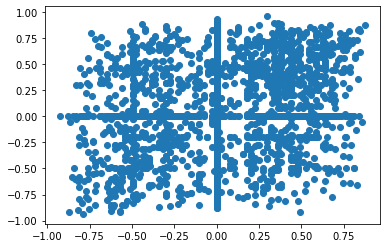

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df1['vs_hl_compounds'].values, df1['vs_ds_compounds'].values)
plt.show()

Similar to analysis in TextBlob, I decided to run clustering algorithms on vaderSentiment data as well.

In [5]:
# storing data
vader_df1 = df1
%store vader_df1

Stored 'vader_df1' (DataFrame)


## Reuters data

In [6]:
# loading data
%store -r df2

In [7]:
analyzer = SentimentIntensityAnalyzer()

hl_compounds = [] # headline compounds
ds_compounds = [] # description/preview compounds

for value in df2["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
for value in df2["Description"].values:
    ds_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])
print(ds_compounds[0:10])

[0.0, -0.4215, -0.296, -0.5719, -0.6124, -0.6486, 0.4215, 0.0, -0.5267, 0.1655]
[0.0258, -0.836, -0.4767, 0.0, -0.2732, -0.3818, -0.2846, -0.0516, -0.4767, 0.3612]


In [8]:
df2['vs_hl_compounds'] = hl_compounds
df2['vs_ds_compounds'] = ds_compounds
df2

,Date,Headlines,Description,vs_hl_compounds,vs_ds_compounds
0,2020-07-18,TikTok considers London and other locations fo...,TikTok has been in discussions with the UK gov...,0.0000,0.0258
1,2020-07-18,Disney cuts ad spending on Facebook amid growi...,Walt Disney has become the latest company to ...,-0.4215,-0.8360
2,2020-07-18,Trail of missing Wirecard executive leads to B...,Former Wirecard chief operating officer Jan M...,-0.2960,-0.4767
3,2020-07-18,Twitter says attackers downloaded data from up...,Twitter Inc said on Saturday that hackers were...,-0.5719,0.0000
4,2020-07-17,U.S. Republicans seek liability protections as...,A battle in the U.S. Congress over a new coron...,-0.6124,-0.2732
...,...,...,...,...,...
32691,2018-03-20,Malaysia says never hired British data firm at...,The Malaysian government and the ruling party ...,0.0000,-0.3400
32692,2018-03-20,Prosecutors search Volkswagen headquarters in ...,German prosecutors said on Tuesday they had se...,0.0000,0.3612
32693,2018-03-20,McDonald's sets greenhouse gas reduction targets,McDonald's Corp on Tuesday announced an approv...,0.0000,-0.2263
32694,2018-03-20,Pratt & Whitney to deliver spare A320neo engin...,Pratt & Whitney will soon begin deliveries of ...,0.0000,-0.6808


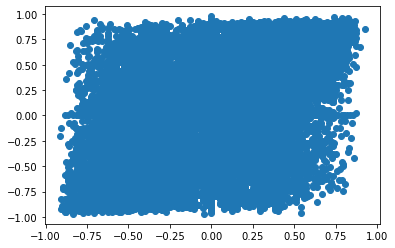

In [9]:
plt.scatter(df2['vs_hl_compounds'].values, df2['vs_ds_compounds'].values)
plt.show()

In [10]:
# storing data
vader_df2 = df2
%store vader_df2

Stored 'vader_df2' (DataFrame)


## The Guardian data

In [11]:
# loading data
%store -r df3

In [12]:
analyzer = SentimentIntensityAnalyzer()

# since guardian dataset does not include description/preview
hl_compounds = [] # headline compounds

for value in df3["Headlines"].values:
    hl_compounds.append(analyzer.polarity_scores(value)['compound'])
    
print(hl_compounds[0:10])

[0.0854, -0.3182, -0.34, 0.0, -0.7845, 0.0, 0.0, -0.3818, -0.5574, 0.0]


In [13]:
df3['vs_hl_compounds'] = hl_compounds
df3

,Date,Headlines,vs_hl_compounds
0,2020-07-19,Business leader \n\n\n Vestager has tasted d...,0.0854
1,2020-07-19,Observer business agenda \n\n\n Centrica: se...,-0.3182
2,2020-07-19,Hidden gems from the world of research \n\n\n...,-0.3400
3,2020-07-19,Johnson is asking Santa for a Christmas recovery,0.0000
4,2020-07-19,‘I now fear the worst’: four grim tales of wor...,-0.7845
...,...,...,...
17789,2017-12-17,"Uber stole trade secrets, bribed foreign offic...",0.0000
17790,2017-12-17,Hundreds to lose jobs as Britvic shuts down No...,-0.4019
17791,2017-12-17,How investing in solar energy can create a bri...,0.7003
17792,2017-12-17,Poundland suppliers hit by insurance downgrade,0.0000


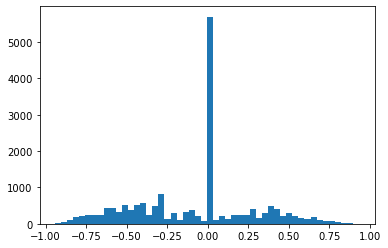

In [14]:
plt.hist(df3['vs_hl_compounds'], bins = 50)
plt.show()

In [15]:
# storing data
vader_df3 = df3
%store vader_df3

Stored 'vader_df3' (DataFrame)


# Compound Polarity Analysis with vaderSentiment - Financial News Sentiment - Clustering

Similar to part 3.2, this notebook utilizes clustering method, an unsupervised learning method of grouping data, to put each article into their respective group of sentiment.

## CNBC data

For CNBC dataset, I use the 2 most popular clustering algorithms, K-Means Clustering and Hierarchical clustering, to categorized the sentiments of CNBC articles.

In [1]:
%store -r vader_df1
X = vader_df1.iloc[:, -2:].values

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

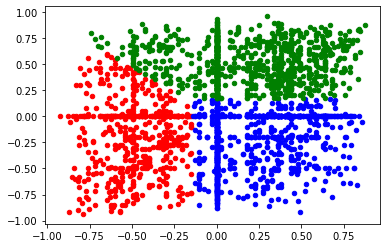

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)

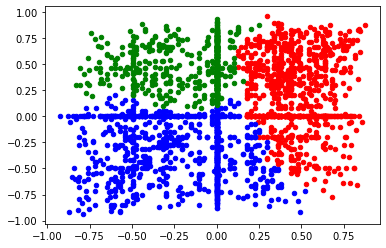

In [5]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

Assessing both K-Means and Hierarchical clusters, I can see 2 different ways these clustering algorithm group given data points. In order to minimize the amount of neutral sentiments, I decided to go with Hierarchical Clustering for this data since it creates significantly less neutral sentiments

From the scatter plot, I can conclude that data points colored in red (y=0) represent positive sentiment, data points colored in blue (y=1) represent negative sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [6]:
c_sentiments = [2 if y == 0 else 1 if y == 1 else 0 for y in y_hc3]
c_sentiments[0:10]

[2, 1, 0, 2, 1, 1, 1, 1, 1, 0]

In [7]:
# Saving vaderSentiment sentiments
%store -r final_df1
final_df1['vs_sentiment'] = c_sentiments
%store final_df1

Stored 'final_df1' (DataFrame)


# Reuters data

In [8]:
%store -r vader_df2
X = vader_df2.iloc[:, -2:].values

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

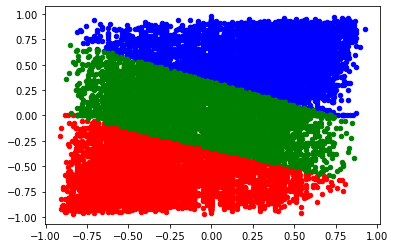

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')

In [12]:
# My device does not have sufficient memory for this model
# hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [13]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')

Again, for this dataset, both K-Means and Hierarchical clusters create a different way of grouping given data points. Knowing that the y-axis contains the preview of the article, it is possible that many articles have negative headlines, but carry positive information about the financial world nonetheless. Coupled with the effort to minimize the amount of neutral sentiments, I decided to go with K-Means Clustering for this data since it creates significantly less neutral sentiments

From the scatter plot, I can conclude that data points colored in blue (y=1) represent positive sentiment, data points colored in red (y=0) represent negative sentiment, and data points colored in green (y=2) represent a mixed sentiment, in which I will assign as neutral.

In [14]:
# reassign the values, which 2, 1, 0 being a positive sentiment, neutral sentiment, and negative sentiment, respectively
r_sentiments = [2 if y == 1 else 1 if y == 2 else 0 for y in y_kmeans]
r_sentiments[0:10]

[1, 0, 0, 1, 0, 0, 1, 1, 0, 2]

In [15]:
# Saving vaderSentiment sentiments
%store -r final_df2
final_df2['vs_sentiment'] = r_sentiments
%store final_df2

Stored 'final_df2' (DataFrame)


# The Guardian data

Similar to part 3.2, instead of applying a clustering model, I apply a Natural Breaks Optimization to this dataset, specifically Jenks Natural Breaks.

In [16]:
%store -r vader_df3
X = vader_df3.iloc[:, -1:].values

c:\users\long's xps13\appdata\local\programs\python\python38\lib\site-packages\jenkspy\core.py:64: UserWarning: Invalid values encountered (NaN or Inf) were ignored
  warnings.warn('Invalid values encountered (NaN or Inf) were ignored')


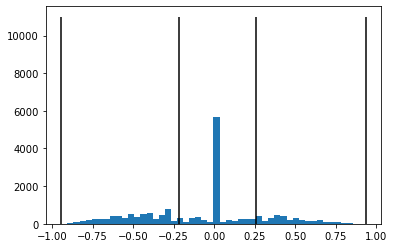

In [17]:
import jenkspy
breaks = jenkspy.jenks_breaks(X, nb_class=3)
plt.hist(X, bins = 50)
for b in breaks:
    plt.vlines(b, ymin=0, ymax=11000)

In [18]:
breaks

[-0.9432, -0.2158, 0.2584, 0.9354]

From the histogram, I can conclude that data points with sentiments below -0.2158 represent negative sentiment, data points with sentiments above 0.2584 represent positive sentiment, and data points with sentiments in between those 2 values represent neutral sentiment

In [19]:
g_sentiments = [0 if x <= breaks[1] else 2 if x >= breaks[2] else 1 for x in X]
g_sentiments[0:10]

[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]

In [20]:
# Saving textblob sentiments
%store -r final_df3
final_df3['vs_sentiment'] = g_sentiments
%store final_df3

Stored 'final_df3' (DataFrame)


In [ ]:
# %store -r vader_df1
# X = vader_df1.iloc[:, -2:].values

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 0)
# y_kmeans = kmeans.fit_predict(X)

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'yellow', label = 'C4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'orange', label = 'C5')
# plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 20, c = 'cyan', label = 'C6')
# plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 20, c = 'magenta', label = 'C7')
# plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 20, c = 'black', label = 'C8')
# plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 20, c = 'purple', label = 'C9')

In [ ]:
# From these 9 cluster, I can pick the 3 top right corner clusters to carry positive sentiment, 
# the 3 lower left clusters to carry negative sentiment, 
# and the rest (the 3 cluster along the diagonal with a negative slope) to carry neutral sentiment.

In [ ]:
# hc3 = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
# y_hc3 = hc3.fit_predict(X)

In [ ]:
# plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
# plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
# plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')
# plt.scatter(X[y_hc3 == 3, 0], X[y_hc3 == 3, 1], s = 20, c = 'yellow', label = 'C4')
# plt.scatter(X[y_hc3 == 4, 0], X[y_hc3 == 4, 1], s = 20, c = 'orange', label = 'C5')
# plt.scatter(X[y_hc3 == 5, 0], X[y_hc3 == 5, 1], s = 20, c = 'cyan', label = 'C6')
# plt.scatter(X[y_hc3 == 6, 0], X[y_hc3 == 6, 1], s = 20, c = 'magenta', label = 'C7')
# plt.scatter(X[y_hc3 == 7, 0], X[y_hc3 == 7, 1], s = 20, c = 'black', label = 'C8')
# plt.scatter(X[y_hc3 == 8, 0], X[y_hc3 == 8, 1], s = 20, c = 'purple', label = 'C9')

# Sentiment Prediction Using Deep Learning - Artificial Neural Network

In this section, I want to create a Artificial Neural Network (ANN), train, and test it on a dataset retrieved from https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news/kernels. This ANN will then fitted to the all 3 given datasets (CNBC, Reuters, and the Guardian) to evaluate whether the headline/preview is positive, neutral, or negative.

In [1]:
import sys
sys.path.insert(0, './lib')
import pandas as pd
import numpy as np
from keras.utils import np_utils
from sentiment_module import tokenize_stem

df = pd.read_csv("./data/dataset.csv", header = None, encoding='latin-1', names=["Sentiment", "Headlines"])
df['Sentiment'] = df['Sentiment'].replace("negative",0).replace("neutral",1).replace("positive",2)

corpus = []
for item in df['Headlines']:
    corpus.append(tokenize_stem(item))

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 0].values
%store cv

[nltk_data] Downloading package stopwords to C:\Users\Long's
[nltk_data]     XPS13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stored 'cv' (CountVectorizer)


In [2]:
print(X.shape)
print(y.shape)

(4846, 6679)
(4846,)


In [3]:
# transform column y to categorical data
y = np_utils.to_categorical(y, num_classes=3)

In [4]:
# Splitting into training sets and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create an Artificial Neural Network

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from keras.utils import np_utils

model = Sequential()
model.add(Dense(128, input_dim=(X_train.shape[1]), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
122/122 [==============================] - 1s 7ms/step - loss: 0.8896 - accuracy: 0.5967
Epoch 2/10
122/122 [==============================] - 1s 5ms/step - loss: 0.5139 - accuracy: 0.7866
Epoch 3/10
122/122 [==============================] - 1s 5ms/step - loss: 0.2300 - accuracy: 0.9203
Epoch 4/10
122/122 [==============================] - 1s 5ms/step - loss: 0.1075 - accuracy: 0.9654
Epoch 5/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9794
Epoch 6/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0401 - accuracy: 0.9848
Epoch 7/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0327 - accuracy: 0.9874: 0s - loss: 0.021
Epoch 8/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0244 - accuracy: 0.9892
Epoch 9/10
122/122 [==============================] - 1s 5ms/step - loss: 0.0288 - accuracy: 0.9886
Epoch 10/10
122/122 [==============================] - 1s 6ms/step - loss: 0.0200 

In [6]:
model.evaluate(x=X_test, y=y_test, batch_size=None, verbose=1, sample_weight=None)

31/31 [==============================] - 0s 2ms/step - loss: 1.8495 - accuracy: 0.7330


[1.84946608543396, 0.7329896688461304]

# Fitting the model to generate sentiment predictions

## CNBC Headlines and Previews

In [7]:
%store -r df1
from sentiment_module import tokenize_stem

# Predicting Headlines
corpus_hl1 = []
for item in df1['Headlines']:
    corpus_hl1.append(tokenize_stem(item))
pred_hl1 = cv.transform(corpus_hl1).toarray()
y_pred_hl1 = model.predict(pred_hl1)

In [8]:
print(y_pred_hl1.shape)
print(y_pred_hl1[0:10])

(2790, 3)
[[3.8671424e-04 3.9488778e-01 6.0472560e-01]
 [4.8199145e-04 9.9943560e-01 8.2302082e-05]
 [7.4745796e-05 3.3978444e-02 9.6594685e-01]
 [3.3359075e-07 9.9015737e-01 9.8423082e-03]
 [4.3858744e-08 9.9999571e-01 4.3189279e-06]
 [1.9821286e-04 9.9975377e-01 4.7994236e-05]
 [1.8200850e-05 9.9998021e-01 1.6045101e-06]
 [4.8642636e-07 9.9972171e-01 2.7774836e-04]
 [3.8362483e-05 9.0547568e-01 9.4486080e-02]
 [1.2204961e-05 9.9850696e-01 1.4807507e-03]]


In [9]:
from sentiment_module import cluster_extraction

# Clustering Headlines
hl_sentiment = cluster_extraction(y_pred_hl1)
hl_sentiment[0:10]

[2, 1, 2, 1, 1, 1, 1, 1, 1, 1]

In [10]:
# Predicting Descriptions/Previews
corpus_ds1 = []
for item in df1['Description']:
    corpus_ds1.append(tokenize_stem(item))
pred_ds1 = cv.transform(corpus_ds1).toarray()
y_pred_ds1 = model.predict(pred_ds1)

In [11]:
print(y_pred_ds1.shape)
print(y_pred_ds1[0:10])

(2790, 3)
[[6.30989305e-08 5.67937076e-01 4.32062894e-01]
 [1.23058697e-02 5.38669825e-02 9.33827221e-01]
 [4.88903834e-06 9.99994993e-01 1.11769445e-07]
 [3.26736971e-09 9.99999404e-01 6.40586848e-07]
 [5.72288409e-05 4.66213278e-05 9.99896169e-01]
 [1.23058697e-02 5.38669825e-02 9.33827221e-01]
 [8.25300006e-08 9.63330388e-01 3.66694406e-02]
 [3.28034103e-01 4.71051876e-03 6.67255402e-01]
 [1.51691688e-02 3.85451800e-04 9.84445393e-01]
 [1.96458935e-03 5.76814055e-01 4.21221316e-01]]


In [12]:
# Clustering Descriptions/Previews
ds_sentiment = cluster_extraction(y_pred_ds1)
ds_sentiment[0:10]

[1, 2, 1, 1, 2, 2, 1, 2, 2, 1]

### Combining

Finally, to determine the sentiment of the article, I am going to evaluate based on both the sentiment of the headline as well as the sentiment of the preview. Firstly, if at least at least 1 out of 2 (headline and preview) is positive and the other isnt negative, the article is assigned as positive. Secondly, if the 2 are both neutral or one is negative, the other is positive and vice versa, the article is assigned as neutral. Thirdly, if at least 1 out of 2 (headline and preview) is negative and the other isnt positive, the article is assigned as negative.

In [13]:
from sentiment_module import combine_sentiments
ann_c_sentiment = combine_sentiments(hl_sentiment, ds_sentiment)
ann_c_sentiment[0:10]

[2, 2, 2, 1, 2, 2, 1, 2, 2, 1]

In [14]:
# storing data for the result dataframe
%store -r final_df1
final_df1['ann_sentiment'] = ann_c_sentiment
%store final_df1

Stored 'final_df1' (DataFrame)


## Reuters Headlines and Previews

### Predicting

In [15]:
%store -r df2

# Headlines
corpus_hl2 = []
for item in df2['Headlines']:
    corpus_hl2.append(tokenize_stem(item))
pred_hl2 = cv.transform(corpus_hl2).toarray()
y_pred_hl2 = model.predict(pred_hl2)
print(y_pred_hl2.shape)

(32696, 3)


In [16]:
print(y_pred_hl2.shape)
print(y_pred_hl2[0:10])

(32696, 3)
[[2.7165914e-08 9.9998093e-01 1.9104598e-05]
 [6.4099318e-01 9.9399149e-02 2.5960761e-01]
 [3.5100028e-02 6.5218367e-02 8.9968163e-01]
 [8.0143036e-07 9.9999845e-01 6.7549411e-07]
 [1.4344887e-05 1.2273005e-01 8.7725562e-01]
 [1.8500049e-08 1.0000000e+00 4.8505182e-09]
 [2.2652510e-03 9.9744177e-01 2.9303078e-04]
 [1.7349186e-05 9.9995959e-01 2.3010365e-05]
 [2.9326597e-05 9.9978524e-01 1.8542174e-04]
 [1.5160785e-05 2.4653543e-04 9.9973828e-01]]


In [17]:
# Clustering Headlines
hl_sentiment = cluster_extraction(y_pred_hl2)
hl_sentiment[0:10]

[1, 0, 2, 1, 2, 1, 1, 1, 1, 2]

In [18]:
# Descriptions/Previews
corpus_ds2 = []
for item in df2['Description']:
    corpus_ds2.append(tokenize_stem(item))
pred_ds2 = cv.transform(corpus_ds2).toarray()
y_pred_ds2 = model.predict(pred_ds2)
print(y_pred_ds2.shape)

(32696, 3)


In [19]:
print(y_pred_ds2.shape)
print(y_pred_ds2[0:10])

(32696, 3)
[[4.33482796e-16 1.00000000e+00 3.37171087e-14]
 [5.73501695e-13 1.00000000e+00 9.13492338e-15]
 [4.10903510e-07 9.99995232e-01 4.46318109e-06]
 [6.18947752e-07 9.99999285e-01 9.34166664e-08]
 [1.88232719e-12 1.00000000e+00 1.06565715e-10]
 [9.87342048e-08 9.99984860e-01 1.49945427e-05]
 [5.99503096e-08 9.99999523e-01 3.27153913e-07]
 [7.49539320e-10 1.00000000e+00 8.05277893e-12]
 [3.04293146e-10 9.99999046e-01 9.35450657e-07]
 [1.04396491e-07 2.91091908e-07 9.99999642e-01]]


In [20]:
# Clustering Descriptions/Previews
ds_sentiment = cluster_extraction(y_pred_ds2)
ds_sentiment[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]

### Combining

Similar to CNBC data, I am going to evaluate each article's sentiment based on both the sentiment of its headline as well as the sentiment of its preview.

In [21]:
from sentiment_module import combine_sentiments
ann_r_sentiment = combine_sentiments(hl_sentiment, ds_sentiment)
ann_r_sentiment[0:10]

[1, 0, 2, 1, 2, 1, 1, 1, 1, 2]

In [22]:
# storing data for the result dataframe
%store -r final_df2
final_df2['ann_sentiment'] = ann_r_sentiment
%store final_df2

Stored 'final_df2' (DataFrame)


## The Guardian Headlines and Previews

### Predicting

In [23]:
%store -r df3

# Headlines
corpus_hl3 = []
for item in df3['Headlines']:
    corpus_hl3.append(tokenize_stem(item))
pred_hl3 = cv.transform(corpus_hl3).toarray()
y_pred_hl3 = model.predict(pred_hl3)
print(y_pred_hl3.shape)

(17794, 3)


In [24]:
print(y_pred_hl3.shape)
print(y_pred_hl3[0:10])

(17794, 3)
[[3.5169342e-04 9.9960142e-01 4.6925092e-05]
 [4.3137833e-03 9.9530089e-01 3.8536280e-04]
 [9.2211485e-06 9.9644655e-01 3.5441997e-03]
 [1.3374630e-03 9.9777168e-01 8.9078065e-04]
 [1.3539822e-01 7.9606497e-01 6.8536855e-02]
 [5.2598962e-06 9.9999428e-01 4.8217618e-07]
 [2.3469028e-08 9.9999881e-01 1.2345121e-06]
 [1.5334741e-03 2.7048718e-03 9.9576169e-01]
 [3.1593016e-05 9.9988854e-01 7.9831792e-05]
 [3.5610481e-04 9.9943393e-01 2.0995163e-04]]


In [25]:
# Clustering Headlines
hl_sentiment = cluster_extraction(y_pred_hl3)
hl_sentiment[0:10]

[1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

In [26]:
# The Guardian's headline sentiment is the only variavle dictate the sentiment of the Guardian's articles
ann_g_sentiment = hl_sentiment

In [27]:
# storing data for the result dataframe
%store -r final_df3
final_df3['ann_sentiment'] = ann_g_sentiment
%store final_df3

Stored 'final_df3' (DataFrame)


# Sentiment Prediction Using Deep Learning - Convolutional Neural Network

## Importing data

In [1]:
import pandas as pd

df = pd.read_csv("./data/dataset.csv", header = None, encoding='latin-1', names=["Sentiment", "Headlines"])
df['Sentiment'] = df['Sentiment'].replace("negative",0).replace("neutral",1).replace("positive",2)
df

,Sentiment,Headlines
0,1,"According to Gran , the company has no plans t..."
1,1,Technopolis plans to develop in stages an area...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the company 's updated strategy f...
...,...,...
4841,0,LONDON MarketWatch -- Share prices ended lower...
4842,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,0,Operating profit fell to EUR 35.4 mn from EUR ...
4844,0,Net sales of the Paper segment decreased to EU...


In [2]:
df.Sentiment.value_counts()

1    2879
2    1363
0     604
Name: Sentiment, dtype: int64

In [3]:
import sys
sys.path.insert(0, './lib')
from sentiment_module import *

df['Splitted'] = df['Headlines'].apply(lambda x: cleaning_data(x))

[nltk_data] Downloading package stopwords to C:\Users\Long's
[nltk_data]     XPS13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df.head(5)

,Sentiment,Headlines,Splitted
0,1,"According to Gran , the company has no plans t...","[according, to, gran, the, company, has, no, p..."
1,1,Technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ..."
2,0,The international electronic industry company ...,"[the, international, electronic, industry, com..."
3,2,With the new production plant the company woul...,"[with, the, new, production, plant, the, compa..."
4,2,According to the company 's updated strategy f...,"[according, to, the, company, s, updated, stra..."


## Splitting data

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [6]:
training_words = [word for tokens in df_train['Splitted'] for word in tokens]

In [7]:
training_words[0:10]

['the',
 'third',
 'quarter',
 'result',
 'also',
 'includes',
 'a',
 'euro',
 'provision',
 'for']

In [8]:
test_words = [word for tokens in df_test['Splitted'] for word in tokens]

In [9]:
test_words[0:10]

['the',
 'bristol',
 'port',
 'company',
 'has',
 'sealed',
 'a',
 'one',
 'million',
 'pound']

## Loading Google News Word2Vec model 

In [10]:
from gensim import models
word2vec_path = './data/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

## Tokenizing & Pad Sequencing

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=len(training_words), char_level=False)
tokenizer.fit_on_texts(df_train['Headlines'].tolist())
train_sequences = tokenizer.texts_to_sequences(df_train['Headlines'].tolist())
train_word_index = tokenizer.word_index
max_seq_len = max([len(x) for x in train_sequences])

# Pad Sequence
train_data = pad_sequences(train_sequences, maxlen=max_seq_len)

In [12]:
train_data.shape

(3876, 71)

In [13]:
test_sequences = tokenizer.texts_to_sequences(df_test['Headlines'].tolist())

# Pad Sequence
test_data = pad_sequences(test_sequences, maxlen=max_seq_len)

## Embedding

In [14]:
import numpy as np

train_embeddings = np.zeros((len(train_word_index)+1, 300))
for word,index in train_word_index.items():
    train_embeddings[index,:] = word2vec[word] if word in word2vec else np.random.rand(300)

In [15]:
train_embeddings.shape

(9020, 300)

## CNN Modeling

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding

In [17]:
from keras.utils import np_utils
X_train = train_data
# y_train = df_train['Sentiment']
X_test = test_data
# y_test = df_test['Sentiment']
y_train = np_utils.to_categorical(df_train['Sentiment'], num_classes=3)
y_test = np_utils.to_categorical(df_test['Sentiment'], num_classes=3)

In [18]:
model = Sequential()

model.add(Embedding(input_dim=len(train_word_index)+1, 
                    output_dim=300, 
                    weights=[train_embeddings], 
                    input_length=max_seq_len, 
                    trainable=False))
model.add(Conv1D(filters = 200, kernel_size = 3, padding='valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
122/122 [==============================] - 3s 21ms/step - loss: 0.8322 - accuracy: 0.6321
Epoch 2/10
122/122 [==============================] - 3s 21ms/step - loss: 0.5870 - accuracy: 0.7544
Epoch 3/10
122/122 [==============================] - 3s 24ms/step - loss: 0.3912 - accuracy: 0.8511
Epoch 4/10
122/122 [==============================] - 3s 25ms/step - loss: 0.2371 - accuracy: 0.9213
Epoch 5/10
122/122 [==============================] - 3s 27ms/step - loss: 0.1258 - accuracy: 0.9678
Epoch 6/10
122/122 [==============================] - 3s 25ms/step - loss: 0.0615 - accuracy: 0.9889
Epoch 7/10
122/122 [==============================] - 3s 26ms/step - loss: 0.0439 - accuracy: 0.9923
Epoch 8/10
122/122 [==============================] - 3s 25ms/step - loss: 0.0385 - accuracy: 0.9936
Epoch 9/10
122/122 [==============================] - 3s 26ms/step - loss: 0.0285 - accuracy: 0.9951
Epoch 10/10
122/122 [==============================] - 3s 25ms/step - loss: 0.0838 - accura

In [19]:
print(X_train.shape)
print(y_train.shape)

(3876, 71)
(3876, 3)


In [20]:
model.evaluate(x=X_test, y=y_test, batch_size=None, verbose=1, sample_weight=None)

31/31 [==============================] - 0s 9ms/step - loss: 0.8279 - accuracy: 0.7845


[0.8279296159744263, 0.7845360636711121]

# Predicting

## CNBC data

### Headlines

In [21]:
%store -r df1
hl1_sequences = tokenizer.texts_to_sequences(df1['Headlines'].tolist())
# Pad Sequence
hl1_data = pad_sequences(hl1_sequences, maxlen=max_seq_len)
y_pred_hl1 = model.predict(hl1_data)

In [22]:
y_pred_hl1[0:10]

array([[1.30593675e-04, 1.06171094e-04, 9.99763191e-01],
       [8.76965292e-04, 9.98603165e-01, 5.19873225e-04],
       [8.57736841e-02, 5.61626395e-03, 9.08610046e-01],
       [2.43258327e-02, 6.52187407e-01, 3.23486745e-01],
       [9.72132385e-03, 9.69221056e-01, 2.10576281e-02],
       [4.05852776e-03, 9.95160997e-01, 7.80438771e-04],
       [2.70037475e-04, 9.99677300e-01, 5.26908443e-05],
       [2.91122943e-01, 7.08683908e-01, 1.93108179e-04],
       [1.52586075e-02, 5.91985881e-01, 3.92755538e-01],
       [7.84892961e-03, 8.89970481e-01, 1.02180615e-01]], dtype=float32)

In [23]:
from sentiment_module import cluster_extraction
hl_sentiment = cluster_extraction(y_pred_hl1)

In [24]:
hl_sentiment[0:10]

[2, 1, 2, 1, 1, 1, 1, 1, 1, 1]

### Description

In [25]:
ds1_sequences = tokenizer.texts_to_sequences(df1['Description'].tolist())
# Pad Sequence
ds1_data = pad_sequences(ds1_sequences, maxlen=max_seq_len)
y_pred_ds1 = model.predict(ds1_data)

In [26]:
y_pred_ds1[0:10]

array([[8.2729312e-06, 9.9977845e-01, 2.1337251e-04],
       [2.4510868e-04, 9.9876726e-01, 9.8757981e-04],
       [1.2591290e-03, 9.9517488e-01, 3.5658858e-03],
       [7.2648941e-04, 9.9526066e-01, 4.0129069e-03],
       [9.7124004e-01, 9.4486261e-03, 1.9311352e-02],
       [2.4510868e-04, 9.9876726e-01, 9.8757981e-04],
       [1.4582376e-05, 9.9805403e-01, 1.9314173e-03],
       [9.8307067e-01, 1.5465150e-02, 1.4641940e-03],
       [1.8112676e-03, 6.0057271e-01, 3.9761603e-01],
       [1.6419889e-03, 7.7933502e-01, 2.1902300e-01]], dtype=float32)

In [27]:
ds_sentiment = cluster_extraction(y_pred_ds1)
ds_sentiment[0:10]

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]

### Combine

In [28]:
cnn_c_sentiment = combine_sentiments(hl_sentiment, ds_sentiment)
cnn_c_sentiment[0:10]

[2, 1, 2, 1, 0, 1, 1, 0, 1, 1]

In [29]:
# storing data for the result dataframe
%store -r final_df1
final_df1['cnn_sentiment'] = cnn_c_sentiment
%store final_df1

Stored 'final_df1' (DataFrame)


## Reuters data

### Headlines

In [30]:
%store -r df2
hl2_sequences = tokenizer.texts_to_sequences(df2['Headlines'].tolist())
# Pad Sequence
hl2_data = pad_sequences(hl2_sequences, maxlen=max_seq_len)
y_pred_hl2 = model.predict(hl2_data)

In [31]:
y_pred_hl2[0:10]

array([[1.2337724e-05, 9.9997222e-01, 1.5466285e-05],
       [9.8997140e-01, 4.3338984e-03, 5.6946725e-03],
       [6.0721417e-03, 9.7219616e-01, 2.1731671e-02],
       [1.2982792e-01, 8.3164650e-01, 3.8525585e-02],
       [8.3935866e-03, 8.5302156e-01, 1.3858491e-01],
       [2.3936755e-03, 9.9640840e-01, 1.1979013e-03],
       [9.9466473e-04, 9.9819750e-01, 8.0779655e-04],
       [1.2796985e-01, 7.4257767e-01, 1.2945250e-01],
       [3.2251229e-04, 9.9966753e-01, 9.9892359e-06],
       [1.3614590e-01, 1.3370870e-01, 7.3014539e-01]], dtype=float32)

In [32]:
from sentiment_module import cluster_extraction
hl_sentiment = cluster_extraction(y_pred_hl2)

In [33]:
hl_sentiment[0:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 2]

### Description

In [34]:
ds2_sequences = tokenizer.texts_to_sequences(df2['Description'].tolist())
# Pad Sequence
ds2_data = pad_sequences(ds2_sequences, maxlen=max_seq_len)
y_pred_ds2 = model.predict(ds2_data)

In [35]:
y_pred_ds2[0:10]

array([[2.1355215e-02, 6.8908483e-01, 2.8955993e-01],
       [4.9470669e-01, 4.0708533e-01, 9.8208003e-02],
       [6.2387860e-01, 3.7132826e-01, 4.7931010e-03],
       [1.4085230e-02, 9.8535776e-01, 5.5695890e-04],
       [3.0549955e-02, 1.8481511e-01, 7.8463489e-01],
       [9.7510433e-01, 2.4155397e-02, 7.4017962e-04],
       [1.2952825e-01, 2.3824328e-03, 8.6808926e-01],
       [1.0938160e-02, 9.8649967e-01, 2.5621513e-03],
       [3.0353493e-03, 9.5955366e-01, 3.7410989e-02],
       [9.4615109e-03, 1.1750282e-04, 9.9042094e-01]], dtype=float32)

In [36]:
ds_sentiment = cluster_extraction(y_pred_ds2)
ds_sentiment[0:10]

[1, 0, 0, 1, 2, 0, 2, 1, 1, 2]

### Combine

In [37]:
cnn_r_sentiment = combine_sentiments(hl_sentiment, ds_sentiment)
cnn_r_sentiment[0:10]

[1, 0, 0, 1, 2, 0, 2, 1, 1, 2]

In [38]:
# storing data for the result dataframe
%store -r final_df2
final_df2['cnn_sentiment'] = cnn_r_sentiment
%store final_df2

Stored 'final_df2' (DataFrame)


## The Guardian data

### Headlines

In [39]:
%store -r df3
hl3_sequences = tokenizer.texts_to_sequences(df3['Headlines'].tolist())
# Pad Sequence
hl3_data = pad_sequences(hl3_sequences, maxlen=max_seq_len)
y_pred_hl3 = model.predict(hl3_data)

In [40]:
y_pred_hl3[0:10]

array([[1.0293522e-02, 9.8063022e-01, 9.0762125e-03],
       [1.6725290e-04, 9.9478418e-01, 5.0486671e-03],
       [2.9536288e-05, 9.9613994e-01, 3.8304848e-03],
       [3.7760653e-03, 9.5738083e-01, 3.8843133e-02],
       [2.8704008e-04, 9.9109811e-01, 8.6148502e-03],
       [2.7328570e-05, 9.8566890e-01, 1.4303677e-02],
       [1.7643274e-01, 8.2212013e-01, 1.4471314e-03],
       [1.8365324e-02, 9.0260494e-01, 7.9029776e-02],
       [4.3315251e-04, 9.9953413e-01, 3.2760443e-05],
       [8.1195042e-04, 9.9402314e-01, 5.1649171e-03]], dtype=float32)

In [41]:
from sentiment_module import cluster_extraction
hl_sentiment = cluster_extraction(y_pred_hl3)

In [42]:
hl_sentiment[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Combine

In [43]:
cnn_g_sentiment = hl_sentiment
cnn_g_sentiment[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [45]:
# storing data for the result dataframe
%store -r final_df3
final_df3['cnn_sentiment'] = cnn_g_sentiment
%store final_df3

Stored 'final_df3' (DataFrame)


In [46]:
final_df1.to_csv("./output/cnbc.csv", index = False)
final_df2.to_csv("./output/reuters.csv", index = False)
final_df3.to_csv("./output/guardian.csv", index = False)